# Essential dynamics

In [1]:
import torch
import pickle
from torch.utils.data import DataLoader

from devinterp.slt.forms import *


plt.rcParams["figure.dpi"] = 300

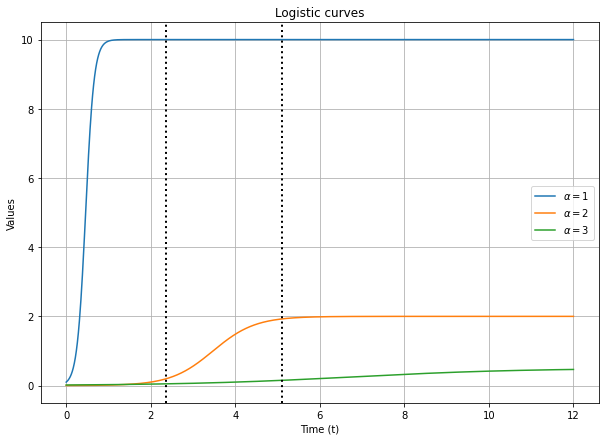

/home/paperspace/devinterp/src/devinterp/slt/forms.py:111: UserWarning: Can't plot vertex influence when cusp data not provided
  warnings.warn("Can't plot vertex influence when cusp data not provided")


Number of samples: 1000
Processing smoothing for PC1
Processing smoothing for PC2
Processing smoothing for PC3
Plotting PC1 vs PC2
Plotting PC1 vs PC3
Plotting PC2 vs PC3


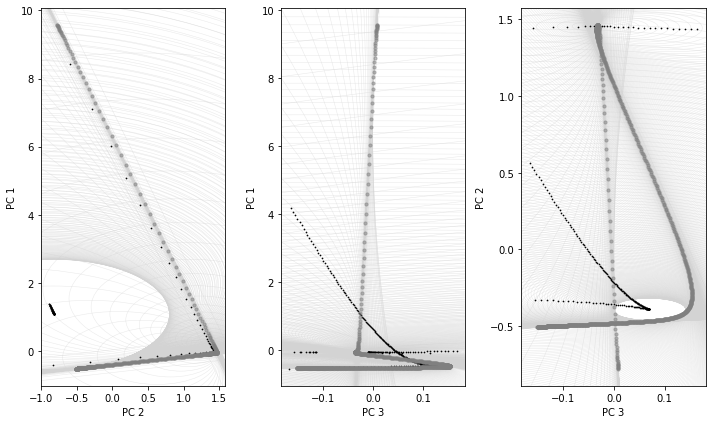

In [2]:
def create_timeseries(s, a, delta, t_range):
    """
    Create a timeseries of 3D vectors based on the given parameters.

    Parameters:
    - s: Tuple or list of s parameters (s_1, s_2, s_3)
    - a: Tuple or list of a parameters (a_1, a_2, a_3)
    - t_range: Array of time values over which to compute the coordinates

    Returns:
    - A numpy array of shape (len(t_range), 3) containing the 3D vectors for each time t
    """
    # Preallocate the array
    timeseries = np.zeros((len(t_range), 3))

    # Compute the coordinates for each time t
    for i, t in enumerate(t_range):
        for j in range(3):
            timeseries[i, j] = (
                s[j]
                * np.exp(s[j] * (t - delta[j]))
                / (np.exp(s[j] * (t - delta[j])) - 1 + s[j] / a[j])
            )

    return timeseries


s = (3.0, 2.0, 1.0)  # s_1, s_2, s_3
s = (10.0, 2.0, 0.5)  # s_1, s_2, s_3
a = (0.1, 0.1, 0.1)  # a_1, a_2, a_3
delta = (0.0, 2.0, 4.0)
num_steps = 5000
t_range = np.linspace(0, 12, num_steps)  # Time range from 0 to 1 with 100 steps

timeseries = create_timeseries(s, a, delta, t_range)

pca = PCA(n_components=3)
samples = pca.fit_transform(timeseries)

marked_cusp_data = [
    {"step": 197, "influence_start": 190, "influence_end": 210},
    {"step": 425, "influence_start": 390, "influence_end": 450},
]
# { "step" : 498, "influence_start" : 450, "influence_end" : 550 }]

# Plotting
plt.figure(figsize=(10, 7), facecolor="white")
plt.plot(t_range, timeseries[:, 0], label=r"$\alpha = 1$")
plt.plot(t_range, timeseries[:, 1], label=r"$\alpha = 2$")
plt.plot(t_range, timeseries[:, 2], label=r"$\alpha = 3$")
plt.axvline(
    marked_cusp_data[0]["step"] / num_steps * 12, color="black", linestyle=":", lw=2
)
plt.axvline(
    marked_cusp_data[1]["step"] / num_steps * 12, color="black", linestyle=":", lw=2
)
# plt.axvline(marked_cusp_data[2]["step"] / num_steps * 12, color='black', linestyle=':', lw=1, alpha=0.2)

plt.xlabel("Time (t)")
plt.ylabel("Values")
plt.title("Logistic curves")
plt.legend()
plt.grid(True)
plt.show()

fig = plot_essential_dynamics_grid(
    samples,
    num_plotted_pca_comps=3,
    plot_caustic=True,
    # marked_cusp_data=marked_cusp_data,
    figsize=(10, 6),
    num_sharp_points=0,
    num_vertices=0,
    osculate_start=1,
    osculate_end_offset=0,
    osculate_skip=1,
    early_smoothing=10,
    late_smoothing=10,
    late_smoothing_from=200,
)

plt.tight_layout()
plt.show()

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
models = torch.load(f"../model1.pt", map_location=DEVICE)

FileNotFoundError: [Errno 2] No such file or directory: '../model1.pt'

In [ ]:
BATCH_SIZE = 1024
dataset = torch.load("ED_dataset.pt")
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
outputs = get_output_for_models(models, dataloader, device=DEVICE)

Explained variance of PCA
[0.5630448  0.15191932 0.0681259  0.0370252 ]
len(colors) != len(transitions), using rainbow palette.
Number of samples: 5000
Processing smoothing for PC1


/home/paperspace/devinterp/src/devinterp/slt/forms.py:103: UserWarning: Can't plot vertex influence when cusp data not provided
  warnings.warn("Can't plot vertex influence when cusp data not provided")


Processing smoothing for PC2
Processing smoothing for PC3
Plotting PC1 vs PC2
Plotting PC1 vs PC3
Plotting PC2 vs PC3


/home/paperspace/devinterp/src/devinterp/slt/forms.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


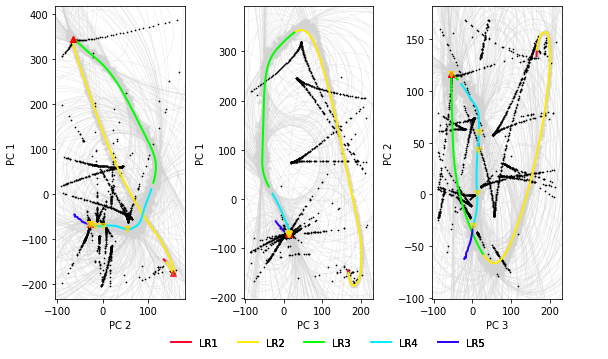

In [ ]:
TRANSITIONS = [  # TODO automate
    (0, 10, "LR1"),
    (10, 400, "LR2"),
    (400, 1_200, "LR3"),
    (1_260, 3_000, "LR4"),
    (3_000, 5_000, "LR5"),
]

# The marked cusps were discovered by the automated vertex discovery and visual inspection,
# while the influence regions are based on analysing the distance functions
marked_cusp_data = [  # TODO automate
    {"idx": 25, "influence_start": 18, "influence_end": 26},
    {"idx": 345, "influence_start": 300, "influence_end": 400},
    {"idx": 1_061, "influence_start": 900, "influence_end": 1_250},
    {"idx": 1_689, "influence_start": 1_500, "influence_end": 1_900},
]

ED_FILENAME = "ED-LR-seed1.pkl"
with open(ED_FILENAME, "rb") as file:
    pca, transformed_samples = pickle.load(file)


print("Explained variance of PCA")
print(pca.explained_variance_ratio_)

fig = plot_essential_dynamics_grid(
    transformed_samples,
    transitions=TRANSITIONS,
    # marked_cusp_data=marked_cusp_data,
    num_plotted_pca_comps=3,
    plot_vertex_influence=True,
    plot_caustic=True,
    figsize=(8, 8 / 10 * 6),
    num_sharp_points=5,
    num_vertices=5,
    osculate_start=1,
    osculate_end_offset=2000,
    osculate_skip=8,
    early_smoothing=1,
    late_smoothing=60,
    late_smoothing_from=200,
)
plt.show()